<a href="https://colab.research.google.com/github/kaitouz/ML-DL/blob/main/OpenEdu/task06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**INPUT**

In [1]:
# Input file name
file_data = 'candy-data.csv'
file_test = 'candy-test.csv'

In [2]:
predictors = 'chocolate, fruity, caramel, peanutyalmondy, nougat, crispedricewafer, hard, bar, pluribus, sugarpercent, pricepercent'
response = 'Y'
excepting = 'Chewey Lemonhead Fruit Mix, Runts, Sixlets'

need_prediction = [['Twix', 1], ['Warheads', 1]]



---



# **Processing**

In [3]:
from pandas import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import *
import sklearn

In [4]:
df_train = pd.read_csv(file_data)
df_test = pd.read_csv(file_test)

In [5]:
df_train

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,Y
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Snickers Crisper,1,0,1,1,0,1,0,1,0,0.604,0.651,59.529251,1
66,Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.069,0.116,59.863998,1
67,Sour Patch Tricksters,0,1,0,0,0,0,0,0,1,0.069,0.116,52.825947,1
68,Starburst,0,1,0,0,0,0,0,0,1,0.151,0.220,67.037628,1


In [6]:
list_drop = excepting.split(', ')
list_drop

['Chewey Lemonhead Fruit Mix', 'Runts', 'Sixlets']

In [7]:
df_train_droped = df_train.drop(df_train[df_train['competitorname'].isin(list_drop)].index)
df_train_droped

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,Y
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Snickers Crisper,1,0,1,1,0,1,0,1,0,0.604,0.651,59.529251,1
66,Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.069,0.116,59.863998,1
67,Sour Patch Tricksters,0,1,0,0,0,0,0,0,1,0.069,0.116,52.825947,1
68,Starburst,0,1,0,0,0,0,0,0,1,0.151,0.220,67.037628,1


In [8]:
X_train = np.array(df_train_droped.drop(['competitorname', 'winpercent', 'Y'], axis = 1))
X_train.shape

(67, 11)

In [9]:
y_train = np.array(df_train_droped['Y'])
y_train.shape

(67,)

In [10]:
clf = LogisticRegression(random_state = 2019, solver = 'lbfgs').fit(X_train, y_train)

In [11]:
df_test

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,Y
0,Sugar Babies,0,1,1,0,0,0,1,0,1,0.647364,0.76700,0
1,Sugar Daddy,1,0,0,0,1,0,1,0,0,0.418000,0.32500,0
2,Super Bubble,0,1,0,0,0,0,0,0,0,0.162000,0.11600,0
3,Swedish Fish,0,1,0,0,0,0,0,0,1,0.604000,0.75500,1
4,Tootsie Pop,1,0,0,0,0,0,0,0,0,0.876560,0.56540,1
5,Tootsie Roll Juniors,1,0,0,0,0,0,0,0,0,0.313000,0.51100,0
6,Tootsie Roll Midgies,1,0,0,0,0,0,0,0,1,0.174000,0.01100,0
7,Tootsie Roll Snack Bars,1,0,0,0,0,0,0,1,0,0.465000,0.32500,1
8,Trolli Sour Bites,0,1,0,0,0,0,0,0,1,0.313000,0.25500,0
9,Twix,0,1,0,0,0,0,0,0,0,0.735430,0.86634,1


In [12]:
X_test = np.array(df_test.drop(['competitorname', 'Y'], axis = 1))
X_test.shape

(15, 11)

In [13]:
list_name = [need_prediction[0][0],  need_prediction[1][0]]
list_name

['Twix', 'Warheads']

In [14]:
list_index = list(df_test[df_test['competitorname'] == list_name[0]].index)
ans1 = [clf.predict_proba(X_test)[list(df_test[df_test['competitorname'] == list_name[0]].index)], clf.predict_proba(X_test)[list(df_test[df_test['competitorname'] == list_name[1]].index)]]
ans1

[array([[0.60741035, 0.39258965]]), array([[0.8504666, 0.1495334]])]



---



In [15]:
df_train

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,Y
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Snickers Crisper,1,0,1,1,0,1,0,1,0,0.604,0.651,59.529251,1
66,Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.069,0.116,59.863998,1
67,Sour Patch Tricksters,0,1,0,0,0,0,0,0,1,0.069,0.116,52.825947,1
68,Starburst,0,1,0,0,0,0,0,0,1,0.151,0.220,67.037628,1


In [16]:
Treshhold = 0.5

y_true = np.array(df_test['Y'])

y_pred_prob = (clf.predict_proba(X_test)[:,1] >= Treshhold) * 1
y_pred = np.array(clf.predict(X_test))

y_pred, y_pred_prob, y_true

(array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1]),
 array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1]),
 array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1]))

In [17]:
TP = (y_pred_prob & y_true).sum()
FN = (np.logical_not(y_pred_prob) & y_true).sum()
FP = (y_pred_prob & np.logical_not(y_true)).sum()
TN = (np.logical_not(y_pred_prob) & np.logical_not(y_true)).sum()

TPR = TP / (TP + FN)   # or use metrics.recall_score

Precision = TP / (TP + FP)  # or use metrics.precision_score

TPR, Precision

(0.6, 0.5)



---
AUC


In [18]:
y_pred_prob

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1])

In [19]:
clf.predict_proba(X_test)[:,1]

array([0.2860383 , 0.40005443, 0.34872332, 0.40179884, 0.78027773,
       0.71699531, 0.74082542, 0.80266581, 0.38536553, 0.39258965,
       0.35694444, 0.1495334 , 0.38229878, 0.59009405, 0.78523424])

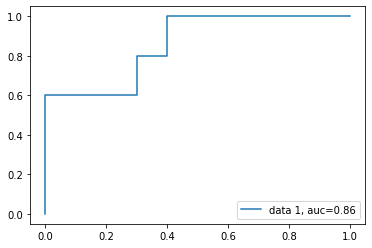

In [20]:
import matplotlib.pyplot as plt
from sklearn import metrics

y_probas = clf.predict_proba(X_test)[:,1]

fpr, tpr, _ = metrics.roc_curve(y_true, y_probas)

auc = metrics.auc(fpr, tpr)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Result

In [21]:
print('probability', list_name[0],'assigned to class 1 = ', ans1[0][0][need_prediction[0][1]])
print('probability', list_name[1],'assigned to class 1 = ', ans1[1][0][need_prediction[1][1]])
print('TPR = ', TPR)
print('Precision = ', Precision)
print('AUC = ', auc)

probability Twix assigned to class 1 =  0.3925896494997688
probability Warheads assigned to class 1 =  0.14953340471285054
TPR =  0.6
Precision =  0.5
AUC =  0.86
